<a href="https://colab.research.google.com/github/ChristianRojasR/Python/blob/main/Practica_TP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img2.freepng.es/20180331/zoe/kisspng-book-report-clip-art-report-5abfb471d3af30.0282813815225130098671.jpg" width="60" height="60"> **Procesamiento y Exploración de Datos 2022 - Práctica TP Final** <img src="https://img2.freepng.es/20180331/zoe/kisspng-book-report-clip-art-report-5abfb471d3af30.0282813815225130098671.jpg"  width="60" height="60">

El propósito del Trabajo Práctico final es evaluar todos los contenidos del curso. La entrega será individual y debe ser subida al campus. Esta es solo una practica por lo que no deberan subirla al campus.


##Diabetes

Los datos que se encuentran en el `archivo diabetes_imputacion.csv` corresponden a un estudio que intentó predecir la ocurrencia de diabetes a partir de un cierto números de variables médicas: su índice de masa corporal (BMI), su edad (Age), numero de embarazos (Pregnancies), grosor de la piel (SkinThickness), presion sanguinea (BloodPressure), nivel de insulina en sangre (Insulin), entre otros.



Importar el archivo `diabetes_imputacion.csv` en su propio drive. Lo pueden encontrar en [este ]( https://drive.google.com/file/d/1qHBJEpEcRW6jBFD6oOm--UyDiNmATzyY/view?usp=sharing) enlace.


###Importamos las librerias necesarias

In [4]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Analisis Exploratorio

Ver los tipos de datos con la función `info()`

Ver los datos estadísticos con la función `describe()`

Hacer un histograma de las principales variables numéricas utilice un bins de 20: Insulin, Glucose, Age y BloodPressure.


In [5]:
#Subir el archivo al drive y copiar la ruta
from google.colab import drive #esta bueno ponerlo arriba junto a las otras librerias

drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
#Crear el dataframe
df = pd.read_csv('/content/drive/MyDrive/Practica_Final/Copia de diabetes_imputacion.csv')

In [7]:
#Visualizamos los primeros registros
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,NaN,0,33.6,0.627,50.0,1
1,1,85.0,66.0,NaN,0,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32.0,1
3,1,89.0,66.0,NaN,94,28.1,0.167,21.0,0
4,0,137.0,40.0,NaN,168,43.1,2.288,33.0,1


In [8]:
#Visualizamos todo el dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,NaN,0,33.6,0.627,50.0,1
1,1,85.0,66.0,NaN,0,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32.0,1
3,1,89.0,66.0,NaN,94,28.1,0.167,21.0,0
4,0,137.0,40.0,NaN,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2,122.0,70.0,NaN,0,36.8,0.340,27.0,0
765,5,121.0,72.0,NaN,112,26.2,0.245,30.0,0
766,1,126.0,60.0,NaN,0,30.1,0.349,47.0,1


In [9]:
#Verifico el tipo de datos contenida del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   700 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             163 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       694 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
#Verifico las estadísticas del dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,700.000000,734.000000,163.000000,768.000000,768.000000,768.000000,694.000000,768.000000
mean,3.845052,120.475714,69.185286,20.993865,79.799479,31.992578,0.471876,33.208934,0.348958
std,3.369578,31.844323,19.283368,14.787589,115.244002,7.884160,0.331329,11.698022,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,26.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626250,40.750000,1.000000
max,17.000000,199.000000,122.000000,47.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###Histogramas

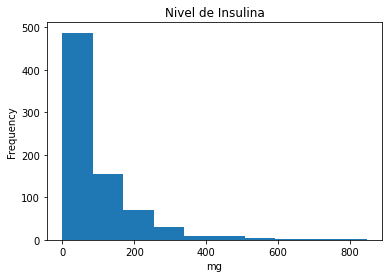

In [17]:
#Histograma personas por nivel de insulina en sangre
df['Insulin'].plot.hist()
plt.title('Nivel de Insulina');
plt.xlabel('mg')
plt.show()

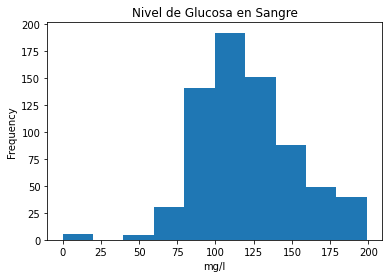

In [19]:
#Histograma personas por nivel de glucosa en sangre
df['Glucose'].plot.hist()
plt.title('Nivel de Glucosa en Sangre');
plt.xlabel('mg/l')
plt.show()

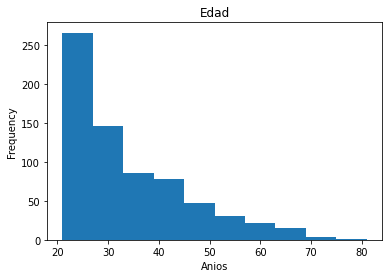

In [20]:
#Histograma personas por edad
df['Age'].plot.hist()
plt.title('Edad');
plt.xlabel('Anios')
plt.show()

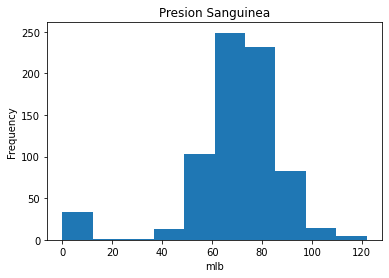

In [22]:
#Histograma personas por Presion Sanguinea
df['BloodPressure'].plot.hist()
plt.title('Presion Sanguinea');
plt.xlabel('mlb')
plt.show()

###Datos Faltantes


Identique cuantos datos faltantes hay en las distintas variables del dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   700 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             163 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       694 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [40]:
#Verifico los datos faltantes de los dataset
pd.isnull(df).sum() #La forma mas facil

Pregnancies                   0
Glucose                      68
BloodPressure                34
SkinThickness               605
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                          74
Outcome                       0
dtype: int64

In [31]:
mascara = pd.isnull(df['Glucose'])
df[mascara].shape[0]

68

In [32]:
mascara = pd.isnull(df['BloodPressure'])
df[mascara].shape[0]

34

In [52]:
mascara = pd.isnull(df['SkinThickness'])
df[mascara].shape[0]

605

In [35]:
mascara = pd.isnull(df['Age'])
df[mascara].shape[0]

74

¿Que podemos observar?

In [111]:
#Elimino las columnas que considero que no son necesarias para el analisis
df = df.drop(['SkinThickness'], axis=1)

In [69]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,0,33.6,0.627,50.0,1
1,1,85.0,66.0,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,94,28.1,0.167,21.0,0
4,0,137.0,40.0,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180,32.9,0.171,63.0,0
764,2,122.0,70.0,0,36.8,0.340,27.0,0
765,5,121.0,72.0,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,30.1,0.349,47.0,1


Para el resto de las columnas que presentan datos faltantes, realice la imputación de los mismos. 
Existen muchas formas de imputar datos, las más sencillas consisten en reemplazar el valor faltante por algun valor como la media, la mediana, el valor máximo/mínimo, etc. Pensar en cada caso cual es la mejor opción y realizar la imputación de los datos faltantes

In [112]:
#Reemplazo los datos faltantes en la edad por ..
df['Age'] = df['Age'].replace(np.nan, int(df['Age'].mean()))

In [113]:
#Reemplazo los datos faltantes en la presion sanguinea por ..
df['BloodPressure'] = df['BloodPressure'].replace(np.nan, df['BloodPressure'].median())

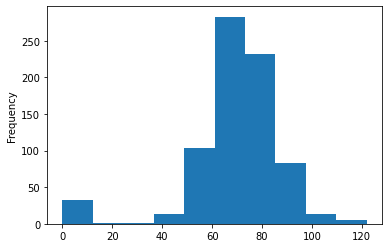

In [114]:
df['BloodPressure'].plot.hist()
plt.show()

In [115]:
#Reemplazo los datos faltantes en el nivel de glucosa por ...
df['Glucose'] = df['Glucose'].replace(np.nan, df['Glucose'].mean())

In [116]:
#Verifico los datos
pd.isnull(df).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Realizar un gráfico boxplot para las variables Glucose, BloodPressure e Insulin. Comente qué es lo que puede concluir de estas variables.


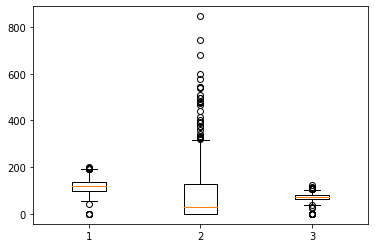

In [103]:
#boxplot para las variables Glucose, BloodPressure e Insulin
boxplot_all = [df['Glucose'], df['Insulin'], df['BloodPressure']]
plt.boxplot(boxplot_all)
plt.show()

Realice una correlación entre las distintas variables del dataset, ¿cuáles son las que mejor correlacionan?

In [104]:
df.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130192,0.137720,-0.073535,0.017683,-0.033523,0.520615,0.221898
Glucose,0.130192,1.000000,0.151644,0.317896,0.224345,0.156993,0.229084,0.426703
BloodPressure,0.137720,0.151644,1.000000,0.090245,0.288138,0.028239,0.232477,0.063766
Insulin,-0.073535,0.317896,0.090245,1.000000,0.197859,0.185071,-0.031530,0.130548
BMI,0.017683,0.224345,0.288138,0.197859,1.000000,0.140647,0.049212,0.292695
DiabetesPedigreeFunction,-0.033523,0.156993,0.028239,0.185071,0.140647,1.000000,0.048234,0.173844
Age,0.520615,0.229084,0.232477,-0.031530,0.049212,0.048234,1.000000,0.246048
Outcome,0.221898,0.426703,0.063766,0.130548,0.292695,0.173844,0.246048,1.000000


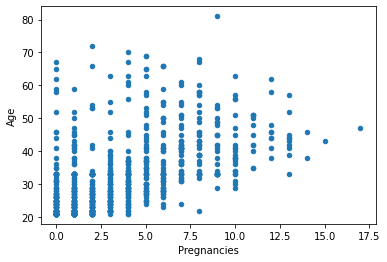

In [105]:
df.plot.scatter(x='Pregnancies', y='Age')
plt.show()

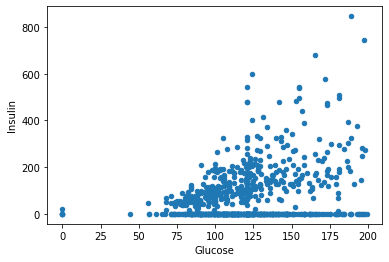

In [108]:
df.plot.scatter(x='Glucose', y='Insulin')
plt.show()